# Plotting Code

Code to plot HECKTOR saturation figure for editorial titled "Evolving Horizons in Radiotherapy Auto-Contouring: Distilling Insights, Embracing Data-Centric Frameworks, and Moving Beyond Geometric Quantification".

Note: Ran this out of Google Colab.

Last updated by: Kareem Wahid on October 8, 2023.


In [1]:
# Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Note: using a Google Colab enviornment, make sure to upload file
file_path = 'HECKTOR_data_full.xlsx'
df = pd.read_excel(file_path)

In [3]:
df.head(n=20)

,HECKTOR_edition,Team,DSC
0,2020,andrei.iantsen [10],0.7591
1,2020,junma [13],0.7525
2,2020,badger [21],0.7355
3,2020,deepX [24],0.7318
4,2020,AIView_sjtu [4],0.7241
5,2020,DCPT,0.7049
6,2020,xuefeng [6],0.6911
7,2020,ucl_charp,0.6765
8,2020,QuritLab [23],0.6677
9,2020,Unipa,0.6674


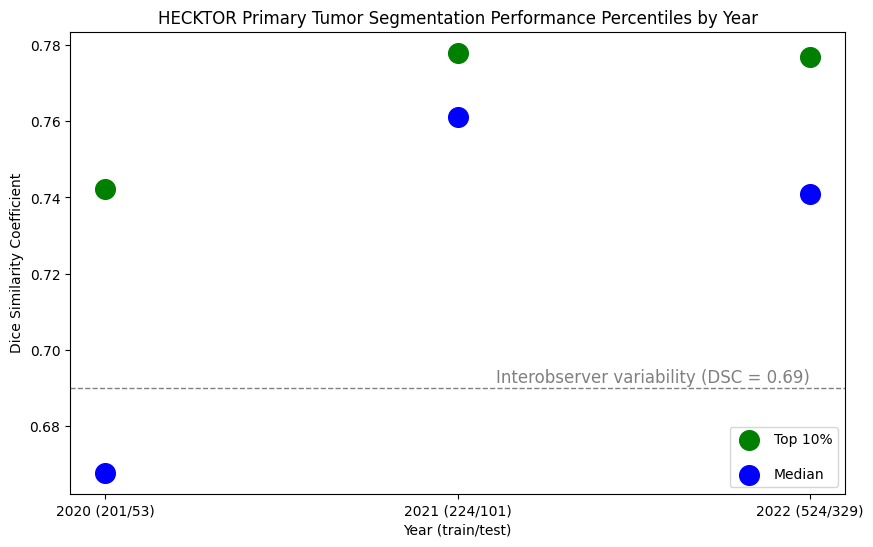

In [4]:
# Calculate the percentiles for DSC for each year
summary = df.groupby('HECKTOR_edition').DSC.agg(
    max = 'max',
    top_10_percentile=lambda x: x.quantile(0.9),
    median='median',
).reset_index()

# Plot
plt.figure(figsize=(10, 6))

# Dot plot for top 10% performance
plt.scatter(summary['HECKTOR_edition'], summary['top_10_percentile'],
            color='green', label='Top 10%', s = 200)

# Dot plot for median performance
plt.scatter(summary['HECKTOR_edition'], summary['median'],
            color='blue', label='Median', s = 200)

# Add a horizontal line to indicate a DSC of 0.69
plt.axhline(y=0.69, color='grey', linestyle='--', linewidth=1)

# Add text on top of the line
max_year = summary['HECKTOR_edition'].max()  # Get the max year for positioning the text
plt.text(max_year, 0.69 + 0.0005, 'Interobserver variability (DSC = 0.69)',
         color='grey', ha='right', va='bottom', fontsize=12)


plt.xlabel('Year (train/test)')
plt.ylabel('Dice Similarity Coefficient')
plt.title('HECKTOR Primary Tumor Segmentation Performance Percentiles by Year')
plt.xticks([2020, 2021, 2022], ["2020 (201/53)", "2021 (224/101)", "2022 (524/329)"]) # Modify x-axis ticks
plt.legend(loc='lower right', labelspacing=1.5) # Increase the spacing between legend items
plt.show()

In [5]:
!pip freeze # show all the installed packages in Colab at the time of running

absl-py==1.4.0
aiohttp==3.8.5
aiosignal==1.3.1
alabaster==0.7.13
albumentations==1.3.1
altair==4.2.2
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array-record==0.4.1
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
attrs==23.1.0
audioread==3.0.1
autograd==1.6.2
Babel==2.13.0
backcall==0.2.0
beautifulsoup4==4.11.2
bleach==6.0.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.2.2
bqplot==0.12.40
branca==0.6.0
build==1.0.3
CacheControl==0.13.1
cachetools==5.3.1
catalogue==2.0.10
certifi==2023.7.22
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.0
chex==0.1.7
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpickle==2.2.1
cmake==3.27.6
cmdstanpy==1.2.0
colorcet==3.0.1
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.3
cons==0.4.6
contextlib2==21.6.0
contourpy==1.1.1
convertdate==2.4.0
cryptography==41.0.4
cufflinks==0.17.3
cvxopt==1.3.2
cvxpy==1.3.2
cycler==0.12.0
cymem==2.0.8
Cython==3.0.2
dask==2023.8.1
datascien